In [ ]:
ruta_2019 = "/content/drive/MyDrive/DataPracticas/Happiness/happy2019.csv"

#Indices de felicidad en el mundo 2019#

Fuente: https://www.kaggle.com/unsdsn/world-happiness

In [ ]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,5)

In [ ]:
df_2019 = pd.read_csv(ruta_2019)
df_2019.sample(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278
52,53,Latvia,5.940,1.187,1.465,0.812,0.264,0.075,0.064
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
69,70,Serbia,5.603,1.004,1.383,0.854,0.282,0.137,0.039
62,63,Paraguay,5.743,0.855,1.475,0.777,0.514,0.184,0.080


In [ ]:
df_2019.shape

(156, 9)

Como se puede notar en las siguiente gráfica, tanto la generosidad como la percepcion de corrupcion no tienen mucha relacion con las demas columnas, por lo tanto serán descartadas por simplicidad.

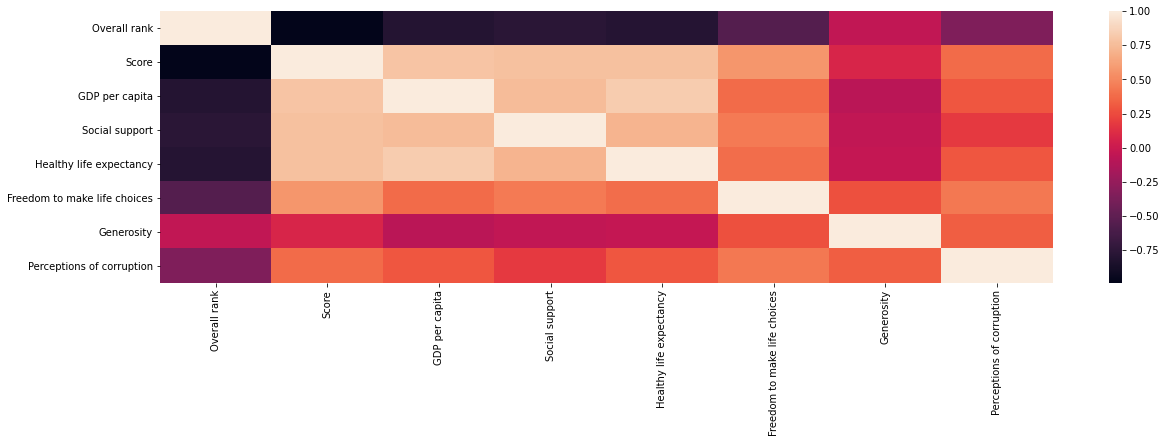

In [ ]:
sns.heatmap(df_2019.corr())

In [ ]:
df_2019.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


In [ ]:
df_2019 = df_2019.drop(columns = ["Overall rank", "Generosity", "Perceptions of corruption"])
df_2019.sample()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
71,Libya,5.525,1.044,1.303,0.673,0.416


Observando la siguentes graficas se pueden notar algunos outliers

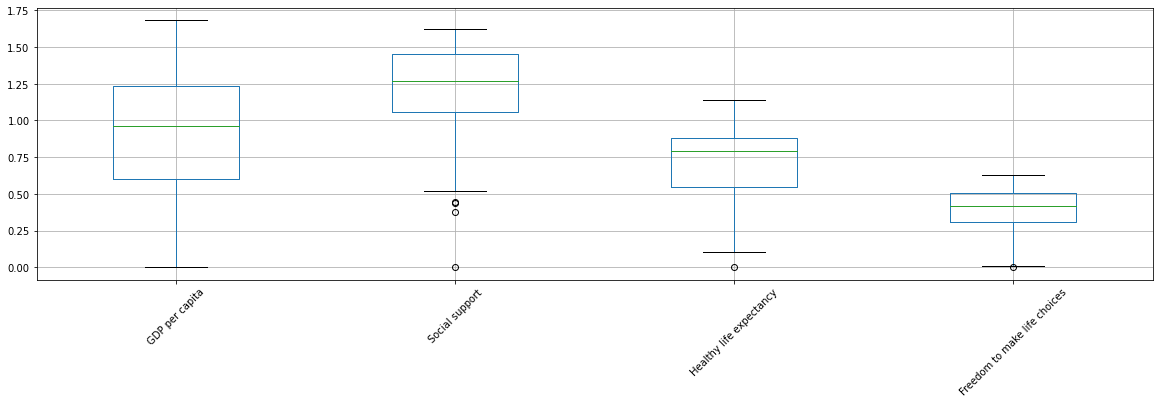

In [ ]:
df_2019.drop(columns = "Score").plot(kind='box')
plt.xticks(rotation = 45)
plt.grid()

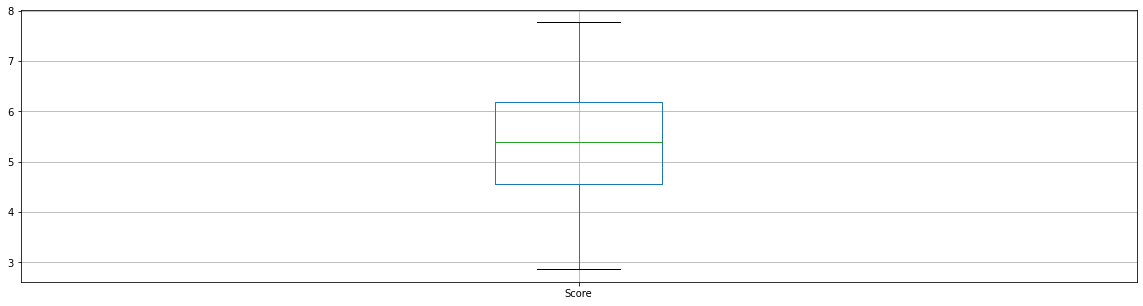

In [ ]:
df_2019["Score"].plot(kind='box')
plt.grid()

In [ ]:
df_2019.shape

(156, 6)

El dataset contiene 6 outliers, los cuales seran imputados utilizando la media

In [ ]:
q1 = df_2019.quantile(0.25)
q3 = df_2019.quantile(0.75)
iqr = q3 - q1
obtener_cantidad_outliers = ((df_2019 < (q1 - 1.5 * iqr)) | (df_2019 > (q3 + 1.5 * iqr))).sum()
obtener_cantidad_outliers

Country or region               0
Freedom to make life choices    1
GDP per capita                  0
Healthy life expectancy         1
Score                           0
Social support                  4
dtype: int64

In [ ]:
seleccionar_outliers = (df_2019 < (q1 - 1.5 * iqr)) | (df_2019 > (q3 + 1.5 * iqr))
df_2019[seleccionar_outliers] = np.nan
imputador = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputador = imputador.fit_transform(df_2019.drop(columns = "Country or region"))
imputador = pd.DataFrame(imputador, columns = df_2019.drop(columns = "Country or region").columns.to_list())
imputador["Country or region"] = df_2019["Country or region"]
df_2019 = imputador

En el siguiente grafico se encuentran los 10 paises con la mayor puntuacion de felicidad en el mundo

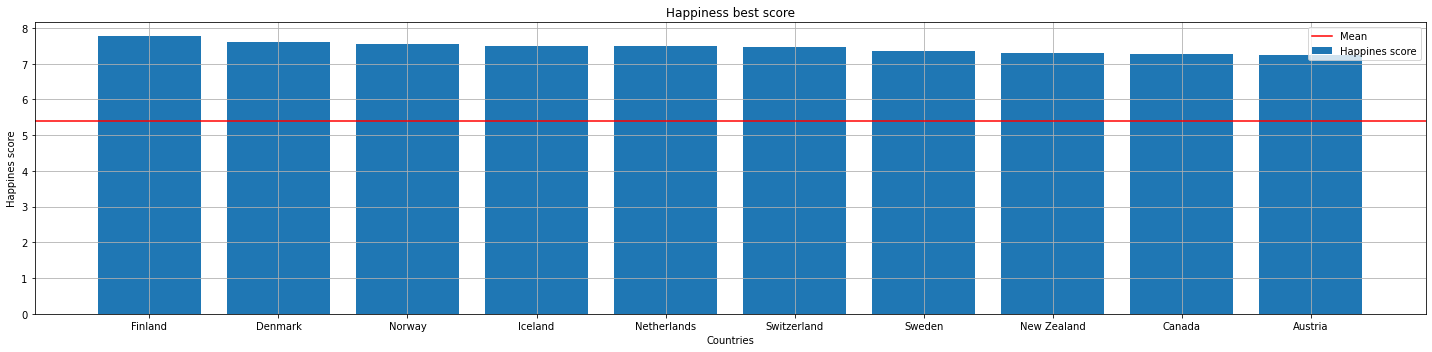

In [ ]:
graficar = df_2019.sort_values(by = "Score", ascending = False)
graficar = graficar[:10]
plt.bar(graficar["Country or region"], graficar["Score"], label = "Happines score")
plt.axhline(df_2019["Score"].mean(), color="red", label = "Mean")
plt.title("Happiness best score")
plt.xlabel("Countries")
plt.ylabel("Happines score")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

En el siguiente grafico se encuentran los 10 paises con la menor puntuacion de felicidad en el mundo

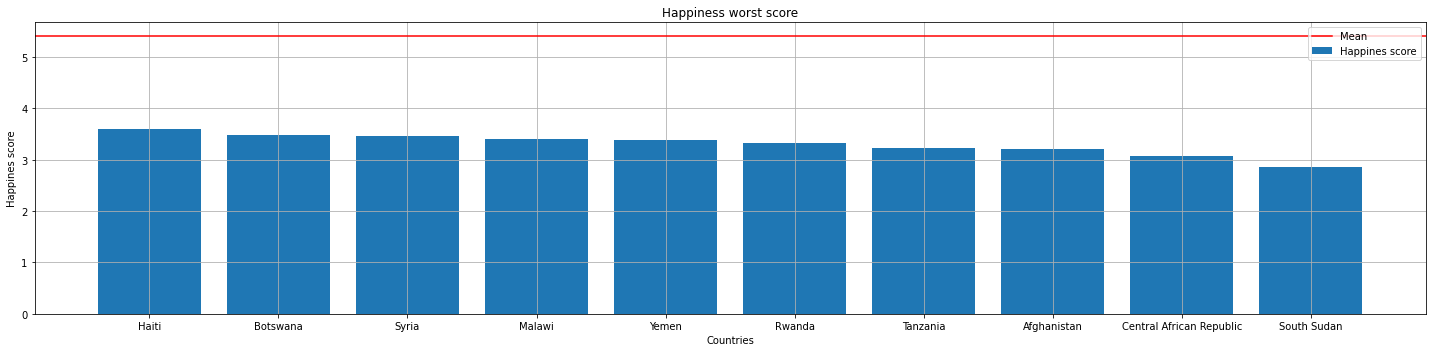

In [ ]:
graficar = df_2019.sort_values(by = "Score", ascending = False)
graficar = graficar[-10:]
plt.bar(graficar["Country or region"], graficar["Score"], label = "Happines score")
plt.axhline(df_2019["Score"].mean(), color="red", label = "Mean")
plt.title("Happiness worst score")
plt.xlabel("Countries")
plt.ylabel("Happines score")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Dentro de los datos tenemos 77 paises cuyo puntaje de felicidad es igual o mayor a la media total

In [ ]:
sobre_media = df_2019.loc[df_2019["Score"] >= df_2019["Score"].mean()]
sobre_media.shape

(77, 6)

Y hay 79 que estan por debajo de la media

In [ ]:
bajo_media = df_2019.loc[df_2019["Score"] < df_2019["Score"].mean()]
bajo_media.shape

(79, 6)

Ahora se van a comparar los indices de felicidad con los diferentes factores

In [ ]:
def graficar_comparaciones(df, columna):
  df = df.sort_values(by = columna, ascending = False)
  paises_top = df[:5]
  paises_bottom = df[-5:]
  paises = pd.concat([paises_top, paises_bottom])
  x_indexes = np.arange(len(paises["Country or region"]))
  width = 0.20
  plt.bar(paises["Country or region"], paises["Score"], label='Happiness score')
  plt.bar(x_indexes - 0.30, paises["GDP per capita"], width = width, color = "black", label = "GDP per capita")
  plt.bar(x_indexes - 0.10, paises["Social support"], width = width, color = "red", label = "Social support")
  plt.bar(x_indexes + 0.10, paises["Healthy life expectancy"], width = width, color = "yellow", label = "Healthy life expectancy")
  plt.bar(x_indexes + 0.30, paises["Freedom to make life choices"], width = width, color = "magenta", label = "Freedom to make life choices")
  plt.axhline(df_2019["Score"].mean(), color="cyan", label = "World happines mean")
  plt.xlabel("Countries")
  plt.ylabel("Scoring")
  plt.xticks(ticks = x_indexes, labels = paises["Country or region"])
  plt.title("Happiness factors comparison (Sorted by: " + str(columna) + ")")
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()

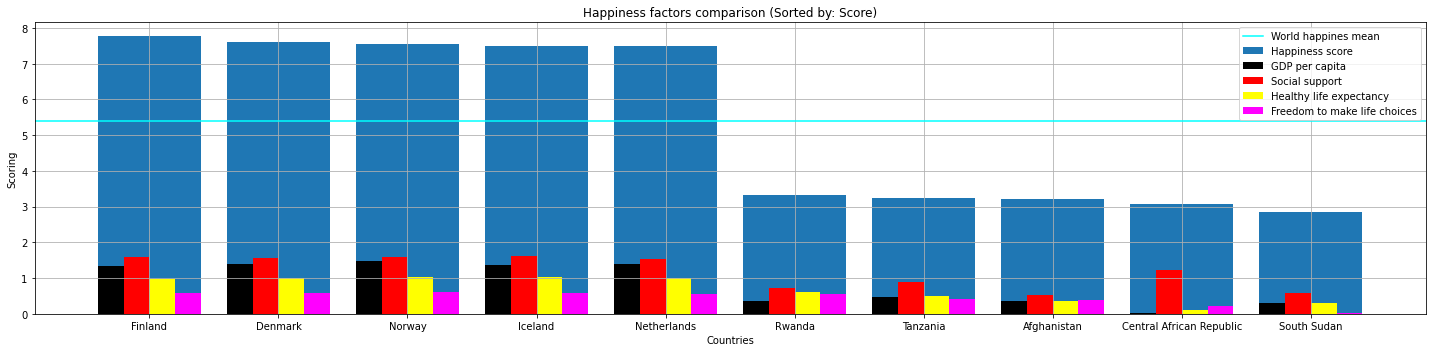

In [ ]:
graficar_comparaciones(df_2019, "Score")

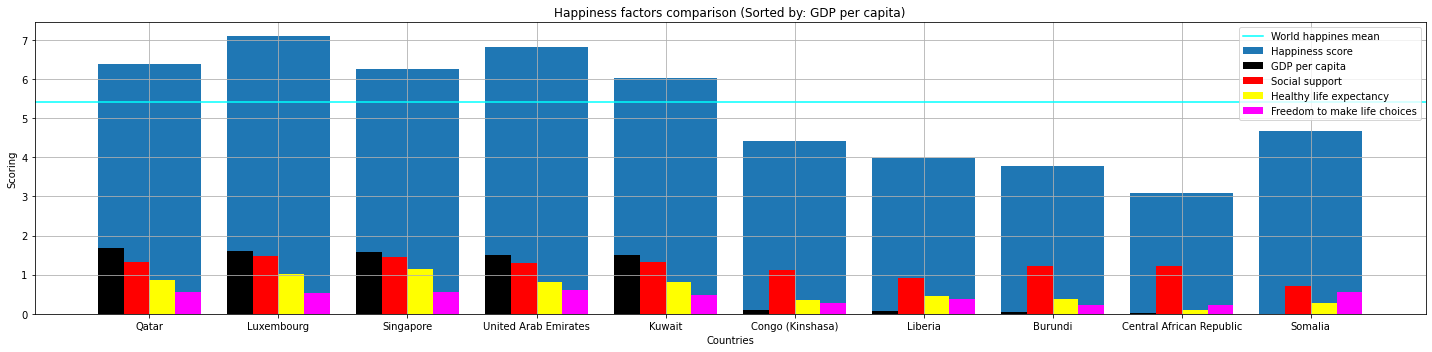

In [ ]:
graficar_comparaciones(df_2019, "GDP per capita")

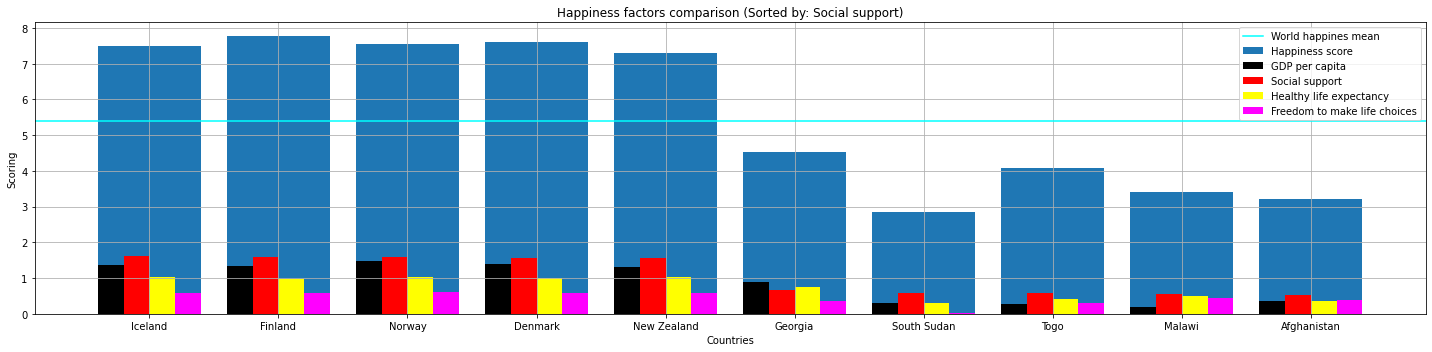

In [ ]:
graficar_comparaciones(df_2019, "Social support")

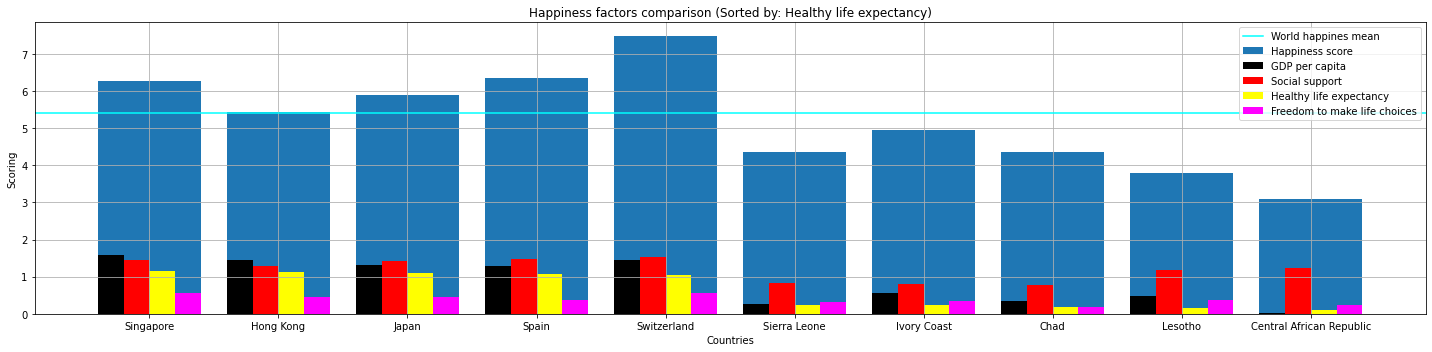

In [ ]:
graficar_comparaciones(df_2019, "Healthy life expectancy") 

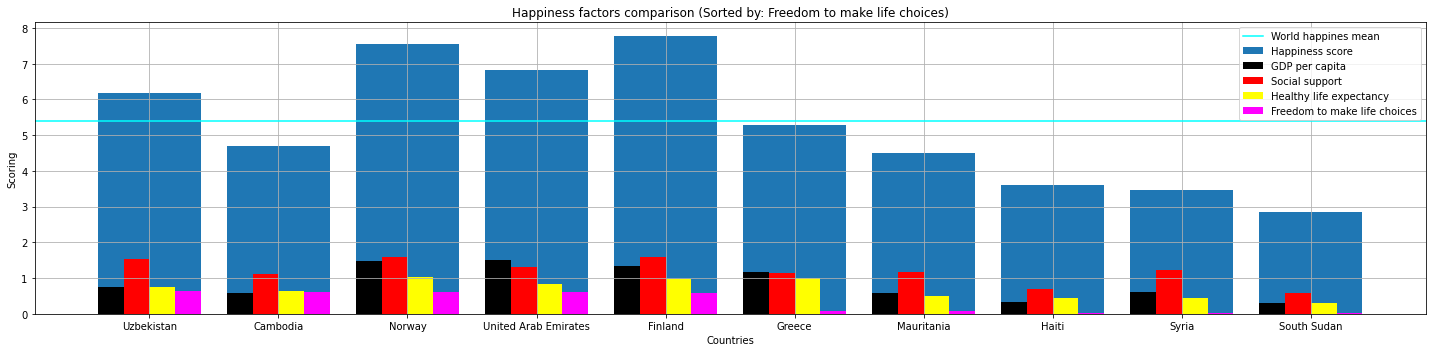

In [ ]:
graficar_comparaciones(df_2019, "Freedom to make life choices")

In [ ]:
df_2019 = df_2019.sort_values(by = "Score", ascending = False)
paises_top = df_2019[:5]

In [ ]:
def comparacion_score(df, columna):
  paises_bottom = df.sort_values(by = columna, ascending = False)[:5]
  paises = pd.concat([paises_top, paises_bottom])
  x_indexes = np.arange(len(paises["Country or region"]))
  width = 0.20
  plt.bar(paises["Country or region"], paises["Score"], label='Happiness score')
  plt.bar(x_indexes - 0.30, paises["GDP per capita"], width = width, color = "black", label = "GDP per capita")
  plt.bar(x_indexes - 0.10, paises["Social support"], width = width, color = "red", label = "Social support")
  plt.bar(x_indexes + 0.10, paises["Healthy life expectancy"], width = width, color = "yellow", label = "Healthy life expectancy")
  plt.bar(x_indexes + 0.30, paises["Freedom to make life choices"], width = width, color = "magenta", label = "Freedom to make life choices")
  plt.axhline(df_2019[columna].mean(), color="cyan", label = "World " + str(columna) + " mean")
  plt.xlabel("Countries")
  plt.ylabel("Scoring")
  plt.xticks(ticks = x_indexes, labels = paises["Country or region"])
  plt.title("Happiness factors comparison (Happiness score vs " + str(columna))
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()

Comparando los paises con mejor puntuacion de felicidad y los paises con mayor PIB per capita podemos notar que no son los mas felices, los paises con mayor felicidad tienden a tener una mejor seguridad social

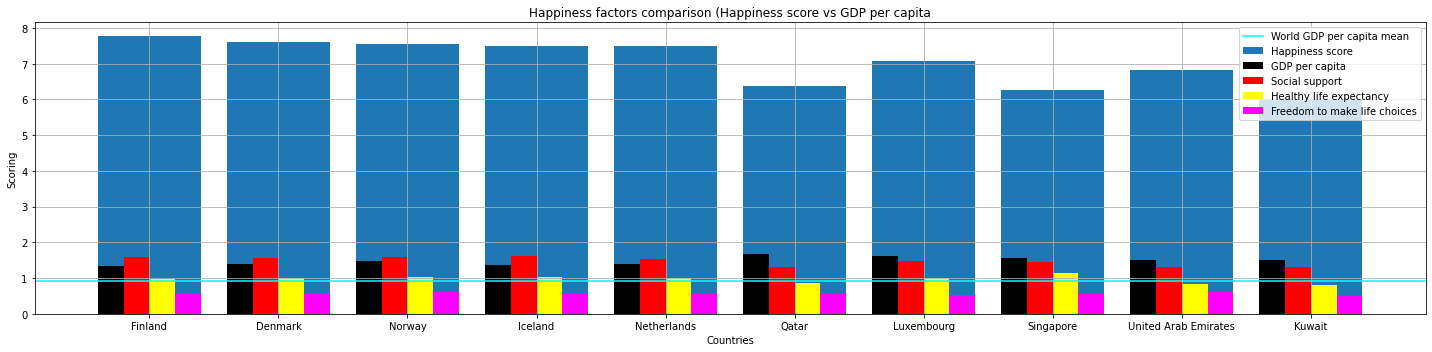

In [ ]:
comparacion_score(df_2019, "GDP per capita")

En esta grafica se puede observar que los paises con mayor puntuacion de felicidad efectivamente son los que tienen una mejor seguridad social

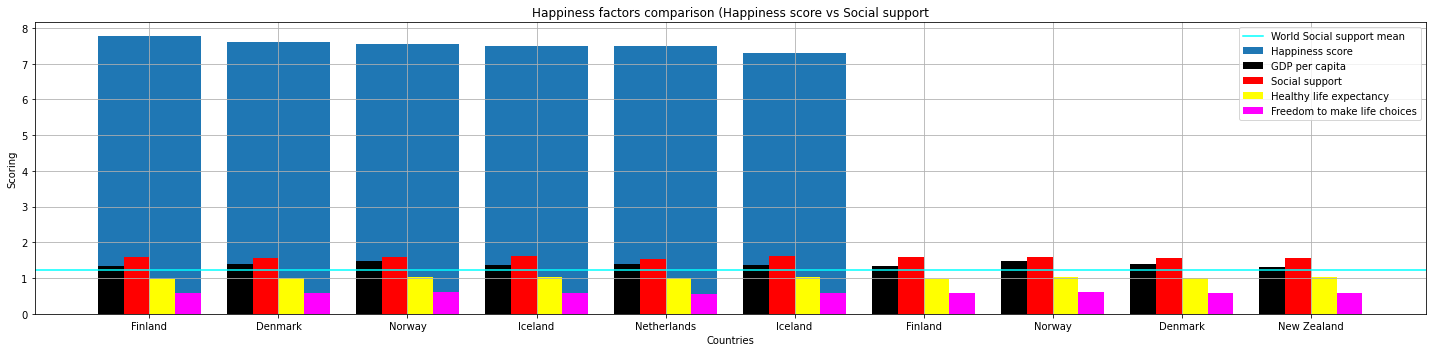

In [ ]:
comparacion_score(df_2019, "Social support")

Los paises mas felices tienden a tener una espectativa de vida alta, sin embargo, hay una diferencia considerable con los paises que tienen mayores espectativas de vida

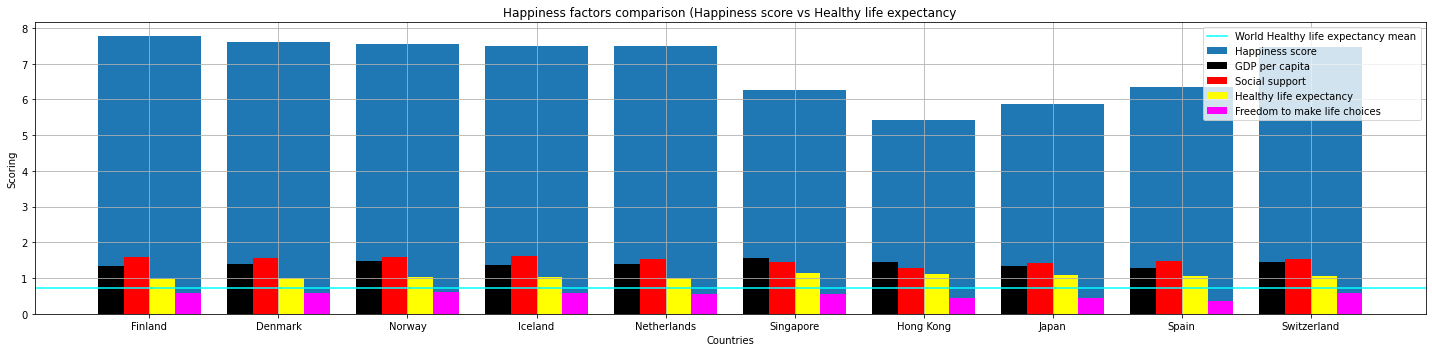

In [ ]:
comparacion_score(df_2019, "Healthy life expectancy")

En cuanto a libertad no hay una diferencia importante

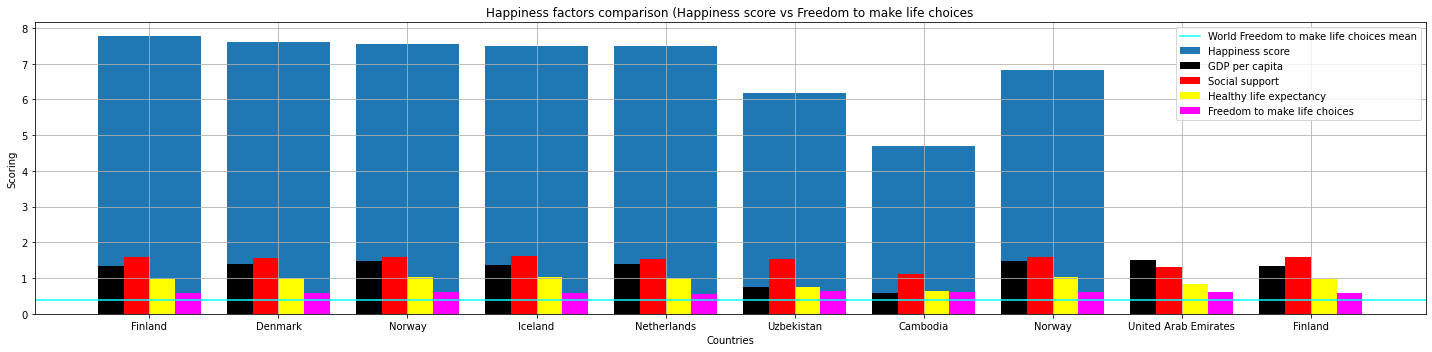

In [ ]:
comparacion_score(df_2019, "Freedom to make life choices")

In [ ]:
df_2019 = df_2019.sort_values(by = "Score", ascending = False)
paises_top = df_2019[:5]

In [ ]:
def comparacion_score_bottom(df, columna):
  paises_bottom = df.sort_values(by = columna, ascending = False)[-5:]
  paises = pd.concat([paises_top, paises_bottom])
  x_indexes = np.arange(len(paises["Country or region"]))
  width = 0.20
  plt.bar(paises["Country or region"], paises["Score"], label='Happiness score')
  plt.bar(x_indexes - 0.30, paises["GDP per capita"], width = width, color = "black", label = "GDP per capita")
  plt.bar(x_indexes - 0.10, paises["Social support"], width = width, color = "red", label = "Social support")
  plt.bar(x_indexes + 0.10, paises["Healthy life expectancy"], width = width, color = "yellow", label = "Healthy life expectancy")
  plt.bar(x_indexes + 0.30, paises["Freedom to make life choices"], width = width, color = "magenta", label = "Freedom to make life choices")
  plt.axhline(df_2019[columna].mean(), color="cyan", label = "World " + str(columna) + " mean")
  plt.xlabel("Countries")
  plt.ylabel("Scoring")
  plt.xticks(ticks = x_indexes, labels = paises["Country or region"])
  plt.title("Happiness factors comparison (Happiness score vs worst " + str(columna))
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()

Ahora se comparan los paises con mayor felicidad con los peores puntajes de las otras areas, en el siguiente grafico se puede notar que inclusive los paises con menor PIB per capita le dan mucha importancia a la seguridad social

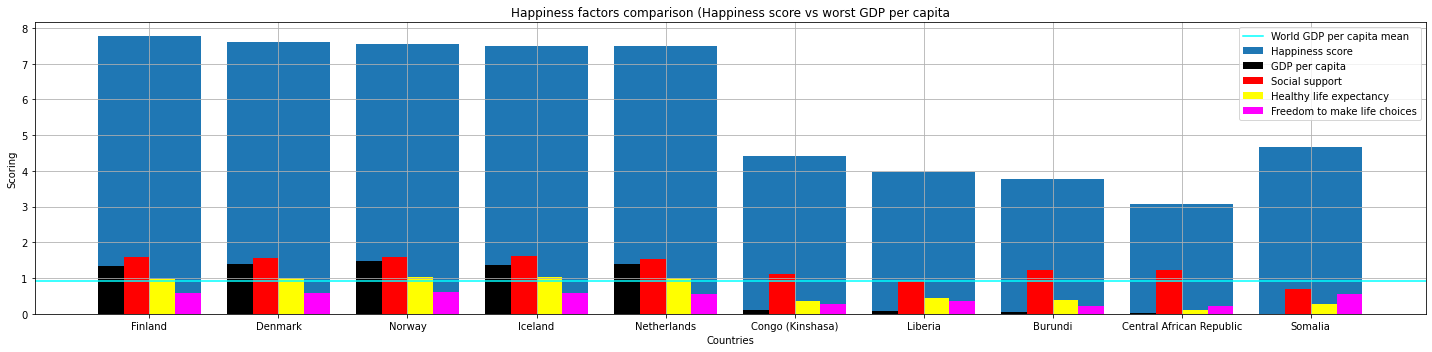

In [ ]:
comparacion_score_bottom(df_2019, "GDP per capita")

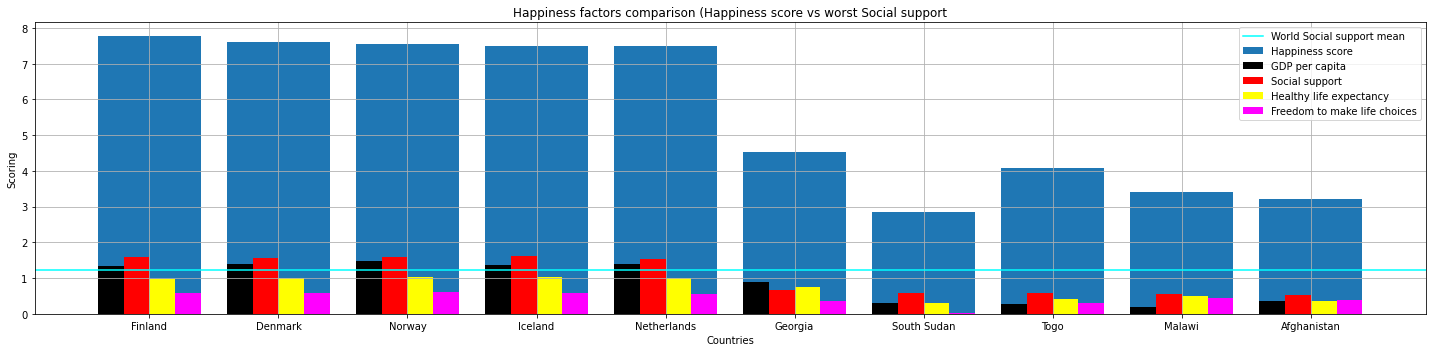

In [ ]:
comparacion_score_bottom(df_2019, "Social support")

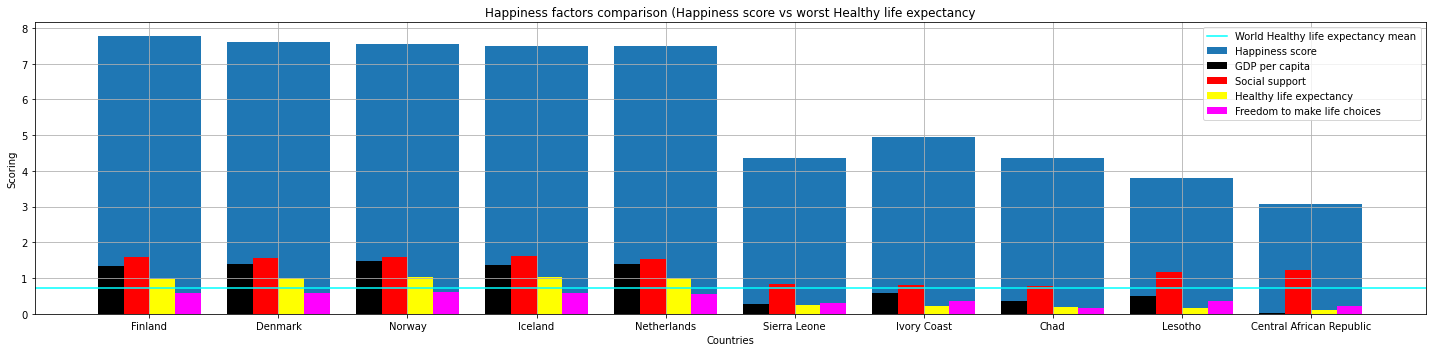

In [ ]:
comparacion_score_bottom(df_2019, "Healthy life expectancy")

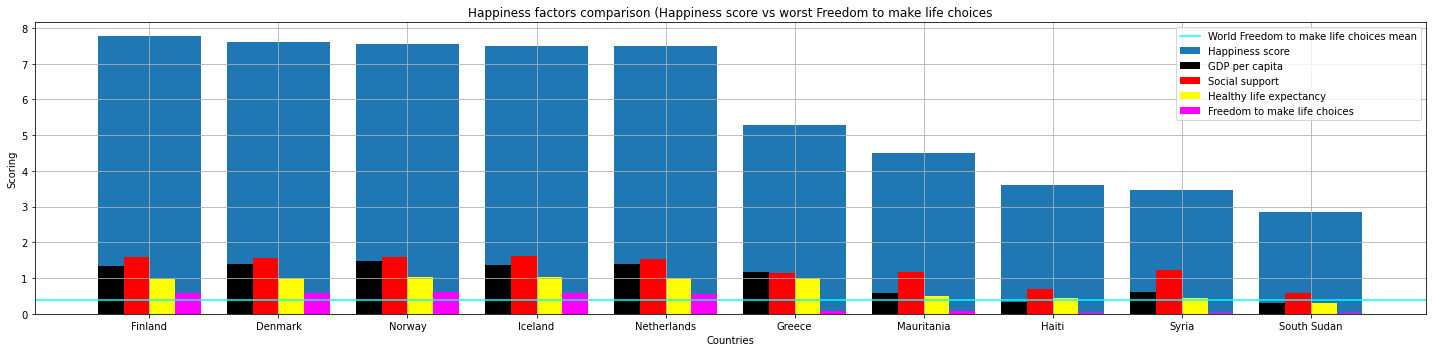

In [ ]:
comparacion_score_bottom(df_2019, "Freedom to make life choices")

Conclusiones:

-La seguridad social tiene la mayor importancia para la felicidad.

-El PIB es importante pero queda en segunda posicion de importancia.

-La espectativa de vida puede llegar a afectar a la larga a un pais, puesto que una poblacion mayoritariamente avanzada de edad genera un desequilibrio considerable.

-Si bien la libertad es muy importante, los paises con mayor felicidad no han sido aquellos con la mejor puntuacion.

-Los paises con mayor puntaje de felicidad tienen una distribucion normal dentro de los valores medidos.